# Projeto Airbnb Rio - Ferramenta de Previsão de Preço de Imóvel

### Contexto

O Airbnb é um marketplace voltado para o aluguel de curto prazo de imóveis. A precificação é regida pela oferta e demanda e os preços são contabilizados na forma de diárias. 

Você cria o seu perfil de host (pessoa que disponibiliza um imóvel para aluguel por diária) e cria o anúncio do seu imóvel.

Nesse anúncio, o host deve descrever as características do imóvel da forma mais completa possível, de forma a orientar os locadores/viajantes na escolha do imóvel.

### Objetivo

Um host é alguém que tem um espaço disponível e tem a intensão de capitalizar em cima disso sem ter que se preocupar com seguro e propaganda. O Airbnb faz isso tudo mas não consegue precificar os imóveis anunciados. A precificação varia de acordo com uma infinidades de variaveis e seria muito complexo fornecer este serviço além do que já é oferecido pela empresa.

O objetivo é construir um modelo de precificação específico para a cidade do Rio de Janeiro, com intuito de ajudar hosts a precificarem seus imoveis listados de acordo com o padrão do mercado e ainda, possíveis inquilinos buscando preços de aluguel por temporada para que ambos possam tomar decisões baseadas em dados. 

### Dados Utilizados

O dataset contém informações mensais de imóveis listados no Airbnb Rio de Janeiro, incluindo:

- Características do imóvel (tipo, quartos, amenidades)
- Localização (bairro, latitude, longitude)
- Preços diários
- Reviews e ratings
- Disponibilidade
- Regras e políticas

Fonte dos dados: [Kaggle - Airbnb Rio de Janeiro](https://www.kaggle.com/datasets/allanbruno/airbnb-rio-de-janeiro)

- Temos bases de abril de 2018 a maio de 2020, com exceção de junho de 2018 que não possui base de dados

### Expectativas Iniciais

- Sazonalidade pode ser um fator importante, visto que meses como dezembro costumam ter um aumento significativo na demanda por imóveis por temporada no RJ.
- No Rio de Janeiro, a localização pode mudar completamente as características do lugar (segurança, beleza natural, pontos turísticos) e por isso deve ter uma forte influência no preço. 

### Importar Bibliotecas e Bases de Dados

In [ ]:
import pandas as pd # biblioteca para análise manipulação de dados
import pathlib as pl # biblioteca que permite percorrer arquivos no computador
import numpy as np # biblioteca para arrays e operações matemáticas
import seaborn as sns # biblioteca gráfica de visualização de dados
import matplotlib.pyplot as plt # biblioteca gráfica de visualização de dados
import plotly.express as px # biblioteca gráfica de visualização de dados

# bibliotecas de machine learning, modelos de previsão e avaliadores de performance dos modelos. 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split

In [ ]:
# Cria-se um dicionario para criar uma coluna os meses em formato de numero. 
# Para isso, pega-se os 3 primeiros caracteres do nome do arquivo, que resulta nos meses abreviados
# Posteriormente serão relacionados a variavel com o mes abreviado com o dicionario para fazer a conversao para números

meses = {'jan': 1, 'fev': 2, 'mar': 3, 'abr': 4, 'mai': 5, 'jun': 6,
         'jul': 7, 'ago': 8, 'set': 9, 'out': 10, 'nov': 11, 'dez': 12}

# Definindo o caminho para os arquivos CSV

caminho = pl.Path(r'C:/Users/igor_/Programacao/Cursos Hashtag/Python/Projeto de Ciencia de Dados e Recomendacoes/dataset/dataset/')

# Cria um dataframe vazio para armazenar os dados de todos os arquivos CSV

df_base_airbnb = pd.DataFrame()

# Itera sobre os arquivos no diretório especificado, realizando para cada arquivo as seguintes operações:

for arquivo in caminho.iterdir():

    df_aux = pd.read_csv(caminho / arquivo) # cria um dataframe auxiliar para cada arquivo CSV
    df_aux['mes'] = meses[arquivo.name[:3]] # Adiciona uma coluna 'mes' com o número do mês correspondente ao nome do arquivo 
    df_aux['ano'] = int(arquivo.name[-8:].replace('.csv','')) # Adiciona uma coluna 'ano' com o ano extraído do nome do arquivo

    df_base_airbnb = pd.concat([df_base_airbnb, df_aux], ignore_index=True) # Concatena o dataframe auxiliar ao dataframe principal, ignorando os índices
        
# Exibe as primeiras linhas do dataframe resultante
df_base_airbnb.head()

C:\Users\igor_\AppData\Local\Temp\ipykernel_1328\2855486417.py:20: DtypeWarning: Columns (62,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aux = pd.read_csv(caminho / arquivo) # cria um dataframe auxiliar para cada arquivo CSV
C:\Users\igor_\AppData\Local\Temp\ipykernel_1328\2855486417.py:20: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aux = pd.read_csv(caminho / arquivo) # cria um dataframe auxiliar para cada arquivo CSV
C:\Users\igor_\AppData\Local\Temp\ipykernel_1328\2855486417.py:20: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aux = pd.read_csv(caminho / arquivo) # cria um dataframe auxiliar para cada arquivo CSV
C:\Users\igor_\AppData\Local\Temp\ipykernel_1328\2855486417.py:20: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aux = pd.read_csv(caminho / a

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,14063,https://www.airbnb.com/rooms/14063,20180414160018,2018-04-14,Living in a Postcard,"Besides the most iconic's view, our apartment ...",NaN,"Besides the most iconic's view, our apartment ...",none,Best and favorite neighborhood of Rio. Perfect...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17878,https://www.airbnb.com/rooms/17878,20180414160018,2018-04-14,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,This is the best spot in Rio. Everything happe...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24480,https://www.airbnb.com/rooms/24480,20180414160018,2018-04-14,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,The studio is located at Vinicius de Moraes St...,My studio is located in the best of Ipanema. ...,none,"The beach, the lagoon, Ipanema is a great loca...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25026,https://www.airbnb.com/rooms/25026,20180414160018,2018-04-14,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31560,https://www.airbnb.com/rooms/31560,20180414160018,2018-04-14,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Consolidar Base de Dados para Analise Qualitativa

Será criada e exportada para csv uma amostra da base de dados completa para que seja feita uma analise e exclusão de features(colunas) desnecessárias para o objetivo final do projeto no Excel.

In [3]:
df_base_airbnb.head(1000).to_csv('base_airbnb_primeiros_registros.csv', index=False, sep=',', encoding='utf-8-sig')

Colunas em que todos ou quase todos os valores são iguais - 'host_listings_count' e 'host_total_listings_count'

In [ ]:
# Compara a coluna 'host_listings_count' com 'host_total_listings_count' e imprime o resultado
print((df_base_airbnb['host_listings_count']==df_base_airbnb['host_total_listings_count']).value_counts())

True     901750
False       460
Name: count, dtype: int64


Verifica e imprime quantas entradas na coluna 'square_feet' são nulas

In [ ]:
print(df_base_airbnb['square_feet'].isnull().sum())

888162


Após análise feita no Excel com o arquivo exportado,

- Tipos de colunas excluídas:
    1. IDs, Links e informações não relevantes para o modelo
    2. Colunas que fornecem informações similares (Ex: Data x Ano/Mês)

### Filtrando a Base de dados após Analise Qualitativa - exclusão de colunas feita diretamente no Excel.

In [6]:
colunas_remanescentes = 'host_response_time','host_response_rate','host_is_superhost','host_listings_count','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','is_business_travel_ready','cancellation_policy','mes','ano'

# Seleciona apenas as colunas remanescentes do dataframe df_base_airbnb

df_base_airbnb = df_base_airbnb.loc[:, colunas_remanescentes]
display(df_base_airbnb)

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,mes,ano
0,NaN,NaN,f,1.0,-22.946854,-43.182737,Apartment,Entire home/apt,4,1.0,...,9.0,9.0,9.0,9.0,9.0,f,f,strict_14_with_grace_period,4,2018
1,within an hour,100%,t,2.0,-22.965919,-43.178962,Condominium,Entire home/apt,5,1.0,...,9.0,10.0,10.0,9.0,9.0,t,f,strict,4,2018
2,within an hour,100%,f,1.0,-22.985698,-43.201935,Apartment,Entire home/apt,2,1.0,...,10.0,10.0,10.0,10.0,9.0,f,f,strict,4,2018
3,within an hour,100%,f,3.0,-22.977117,-43.190454,Apartment,Entire home/apt,3,1.0,...,10.0,10.0,10.0,10.0,9.0,f,f,strict,4,2018
4,within an hour,100%,t,1.0,-22.983024,-43.214270,Apartment,Entire home/apt,3,1.0,...,10.0,10.0,10.0,10.0,9.0,t,f,strict,4,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902205,within an hour,93%,f,0.0,-23.003180,-43.342840,Apartment,Entire home/apt,4,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,9,2019
902206,NaN,NaN,f,0.0,-22.966640,-43.393450,Apartment,Entire home/apt,4,2.0,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,9,2019
902207,within a few hours,74%,f,32.0,-22.962080,-43.175520,Apartment,Entire home/apt,5,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,strict_14_with_grace_period,9,2019
902208,NaN,NaN,f,0.0,-23.003400,-43.341820,Apartment,Entire home/apt,4,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,strict_14_with_grace_period,9,2019


### Tratamento de Valores Faltantes

In [7]:
print(df_base_airbnb.isnull().sum())

host_response_time             401843
host_response_rate             401846
host_is_superhost                 460
host_listings_count               460
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                        1724
bedrooms                          850
beds                             2502
bed_type                            0
amenities                           0
price                               0
security_deposit               421280
cleaning_fee                   313506
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
number_of_reviews                   0
review_scores_rating           448016
review_scores_accuracy         448586
review_scores_cleanliness      448413
review_scores_checkin          448650
review_score

In [ ]:
# percorre a base de dados e exclui colunas que possuem mais de 100.000 valores nulos. 

for coluna in df_base_airbnb:
    if (df_base_airbnb[coluna].isnull().sum()) > 100000:
        df_base_airbnb.drop(columns=coluna, axis=1, inplace=True)
        print(f'Coluna {coluna} excluida')

print('=============================================')
print(df_base_airbnb.isnull().sum())

Coluna host_response_time excluida
Coluna host_response_rate excluida
Coluna security_deposit excluida
Coluna cleaning_fee excluida
Coluna review_scores_rating excluida
Coluna review_scores_accuracy excluida
Coluna review_scores_cleanliness excluida
Coluna review_scores_checkin excluida
Coluna review_scores_communication excluida
Coluna review_scores_location excluida
Coluna review_scores_value excluida
host_is_superhost            460
host_listings_count          460
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                   1724
bedrooms                     850
beds                        2502
bed_type                       0
amenities                      0
price                          0
guests_included                0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
number_of_reviews              0

### Removendo as linhas com dados nulos

In [9]:
print(df_base_airbnb.shape)

linhas_ant = df_base_airbnb.shape[0] # coloca em uma variavel o valor da qtd de linhas da tupla retornada pelo .shape

df_base_airbnb = df_base_airbnb.dropna() # remove as linhas que possuem valores nulos em qualquer coluna do dataframe

linhas_post = df_base_airbnb.shape[0] # coloca em uma variavel o valor da qtd de linhas da tupla retornada pelo .shape, 

print(f'Novo shape do dataframe (linhas, colunas): {df_base_airbnb.shape}')

print(f'{linhas_ant - linhas_post} linhas foram removidas do dataframe')

# OBS: O dropna() remove todas as linhas que possuem pelo menos um valor nulo, se quiser remover apenas as linhas que possuem valores nulos em todas as colunas, deve-se usar o parâmetro how='all' no método dropna()


(902210, 23)
Novo shape do dataframe (linhas, colunas): (897709, 23)
4501 linhas foram removidas do dataframe


In [10]:
print(df_base_airbnb.isnull().sum())

host_is_superhost           0
host_listings_count         0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
mes                         0
ano                         0
dtype: int64


### Verificando os Tipos de Dados em cada coluna

In [11]:
print(df_base_airbnb.info())

<class 'pandas.core.frame.DataFrame'>
Index: 897709 entries, 0 to 902209
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   host_is_superhost         897709 non-null  object 
 1   host_listings_count       897709 non-null  float64
 2   latitude                  897709 non-null  float64
 3   longitude                 897709 non-null  float64
 4   property_type             897709 non-null  object 
 5   room_type                 897709 non-null  object 
 6   accommodates              897709 non-null  int64  
 7   bathrooms                 897709 non-null  float64
 8   bedrooms                  897709 non-null  float64
 9   beds                      897709 non-null  float64
 10  bed_type                  897709 non-null  object 
 11  amenities                 897709 non-null  object 
 12  price                     897709 non-null  object 
 13  guests_included           897709 non-null  int64 

In [12]:
print(df_base_airbnb.dtypes)
print('='*100)

print(df_base_airbnb.loc[0,:])

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
mes                           int64
ano                           int64
dtype: object
host_is_superhost                                                           f
host_listings_count                                                       1.0
la

### Alteração de tipo de dado das variáveis que são object e precisam ser float

In [13]:
# Remove '$' e ',' e converte para float
df_base_airbnb['price'] = df_base_airbnb['price'].str.replace('[$,]', '', regex=True).astype(np.float32, copy=False)

df_base_airbnb['extra_people'] = df_base_airbnb['extra_people'].str.replace('[$,]', '', regex=True).astype(np.float32, copy=False)

print(df_base_airbnb.dtypes)

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float32
guests_included               int64
extra_people                float32
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
mes                           int64
ano                           int64
dtype: object


### Análise Exploratória e Tratamento de Outliers

##### Plotando a matriz de correlação das features

<Axes: >

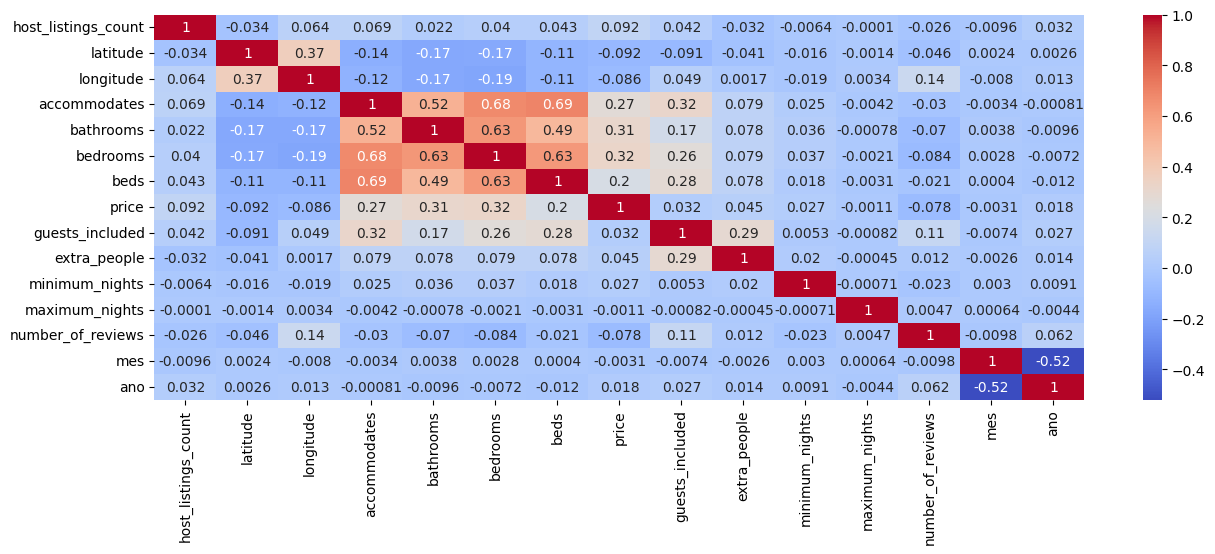

In [14]:
plt.figure(figsize=(15,5))
sns.heatmap(df_base_airbnb.corr(numeric_only=True), annot=True, cmap='coolwarm')

##### - Para o tratamento de outliers iremos aplicar o método do <b>Intervalo Interquartil</b> de Estatística Descritiva 

O método do Intervalo Interquartil (IQR – Interquartile Range) é uma técnica da estatística descritiva muito usada para:

- Resumir a dispersão dos dados (variabilidade)
- Identificar outliers (valores discrepantes)

O IQR é a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1) de um conjunto de dados ordenado:

- Intervalo Interquartil: 
    - <b>IQR = Q3 − Q1</b>

        - Q1 (1º quartil): valor abaixo do qual estão 25% dos dados
        - Q3 (3º quartil): valor abaixo do qual estão 75% dos dados
        - IQR: representa a "faixa do meio" dos 50% centrais da amostra

Valores são considerados outliers se estiverem muito distantes do centro dos dados.

- Limite inferior: 
    - <b>LI = Q1 − 1.5 × IQR</b>
- Limite superior: 
    - <b>LS= Q3 + 1.5 × IQR</b>

Qualquer valor fora desses limites é um outlier.

### Definindo funções de definição de limite inferior e limite superior para analise de cada feature (coluna)

In [15]:
def limites (coluna):
    """
    Calcula os limites inferior e superior para a coluna especificada.
    Utiliza o método IQR (Intervalo Interquartil) para detectar outliers.
    """
    Q1 = df_base_airbnb[coluna].quantile(0.25)
    Q3 = df_base_airbnb[coluna].quantile(0.75)
    IQR = Q3 - Q1 # amplitude do intervalo interquartil
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return float(limite_inferior), float(limite_superior)

def remove_outliers(coluna):
    '''Esta função remove os outliers da coluna especificada. Utiliza os limites calculados pela função limites().'''
    
    qtd_linhas_inicial = df_base_airbnb.shape[0] # pega a quantidade de linhas do dataframe antes da remoção dos outliers
    limite_inferior, limite_superior = limites(coluna) # calcula os limites inferior e superior para a coluna especificada
    df_base_airbnb.drop(df_base_airbnb[(df_base_airbnb[coluna] < limite_inferior) | (df_base_airbnb[coluna] > limite_superior)].index, inplace=True)
    # Atualiza o dataframe removendo as linhas que estão fora dos limites calculados
    qtd_linhas_final = df_base_airbnb.shape[0] # calcula a quantidade de linhas do dataframe após a remoção dos outliers
    linhas_removidas = qtd_linhas_inicial - qtd_linhas_final # calcula a quantidade de linhas removidas
    return df_base_airbnb, linhas_removidas

    

### Definindo função para plotar e analisar os graficos de cada feature (coluna)

In [16]:
def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    sns.boxplot(x=df_base_airbnb[coluna], ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=df_base_airbnb[coluna], ax=ax2)
    """
    Plota um diagrama de caixa para a coluna especificada.
    """  

def histograma(coluna):
    plt.figure(figsize=(15, 5))
    sns.histplot(df_base_airbnb[coluna], kde=True, bins=50)
    """
    Plota um histograma para a coluna especificada.
    """

def barras(coluna):
    plt.figure(figsize=(15, 5))
    sns.barplot(x=df_base_airbnb[coluna].value_counts().index, y=df_base_airbnb[coluna].value_counts())
    """
    Plota um gráfico de barras para a coluna especificada.
    """

## Analise de Valores Numéricos Contínuos

#### Analisando a feature (coluna) de PREÇO cobrado pelo host (price)

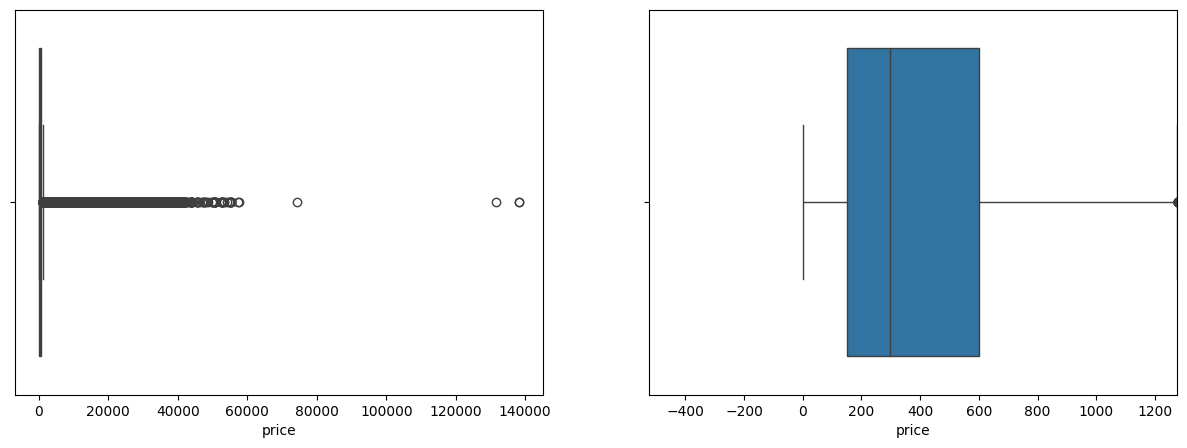

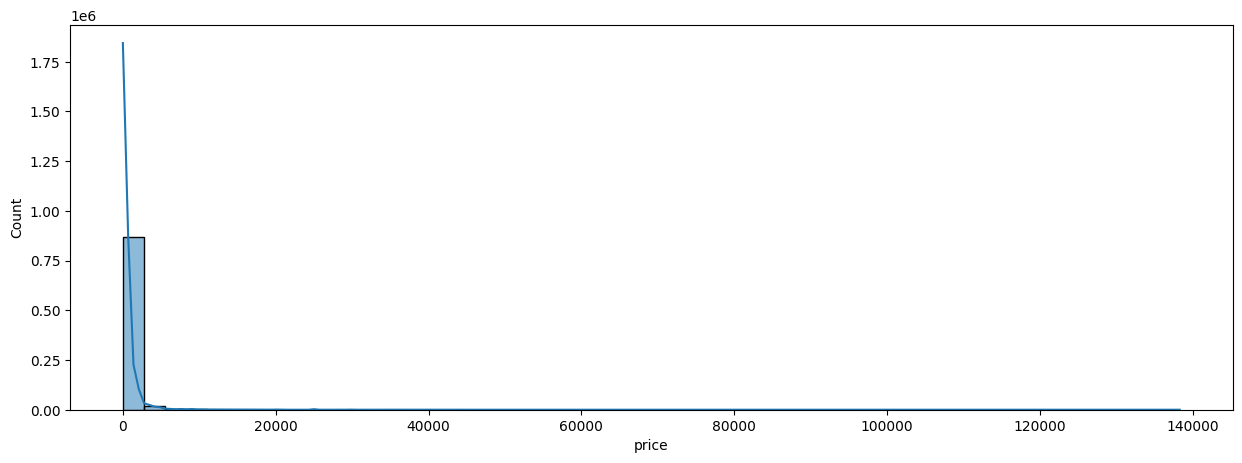

In [17]:
diagrama_caixa('price')
histograma('price')

#### Removendo as linhas que contém outliers de preço

In [18]:
df_base_airbnb, linhas_removidas = remove_outliers('price')
print(f"{linhas_removidas} linhas foram removidas do dataframe devido a outliers da feature(coluna).")

87282 linhas foram removidas do dataframe devido a outliers da feature(coluna).


<b>[Decisão]</b> --> Através de uma análise feita usando métodos de estatística discritiva, optou-se por retirar as linhas em que os preços estão acima do limite superior pois são valores referentes a imoveis de alto luxo e o modelo não é pensado para atingir este público.

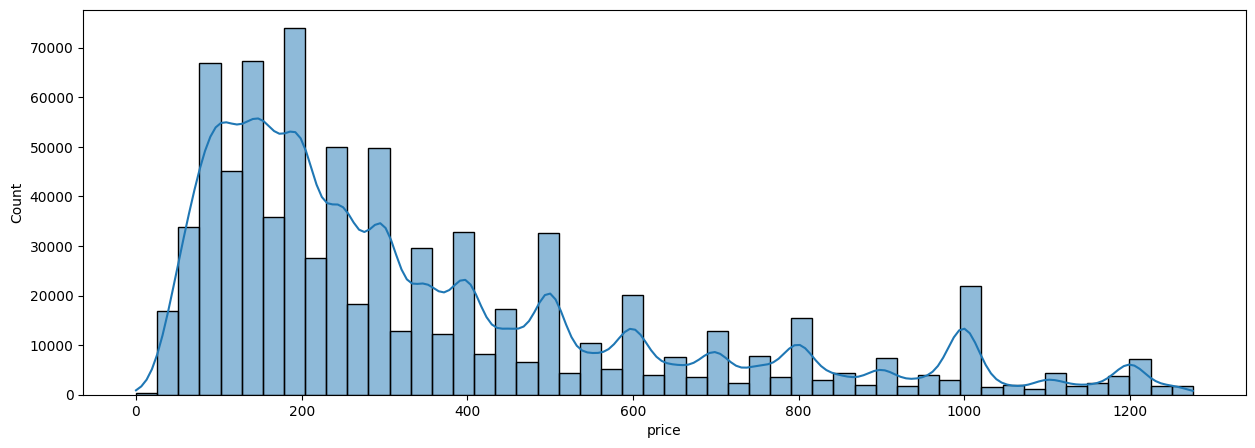

In [19]:
histograma('price')

### Analisando a feature (coluna) de PESSOAS ADICIONAIS (extra_people)

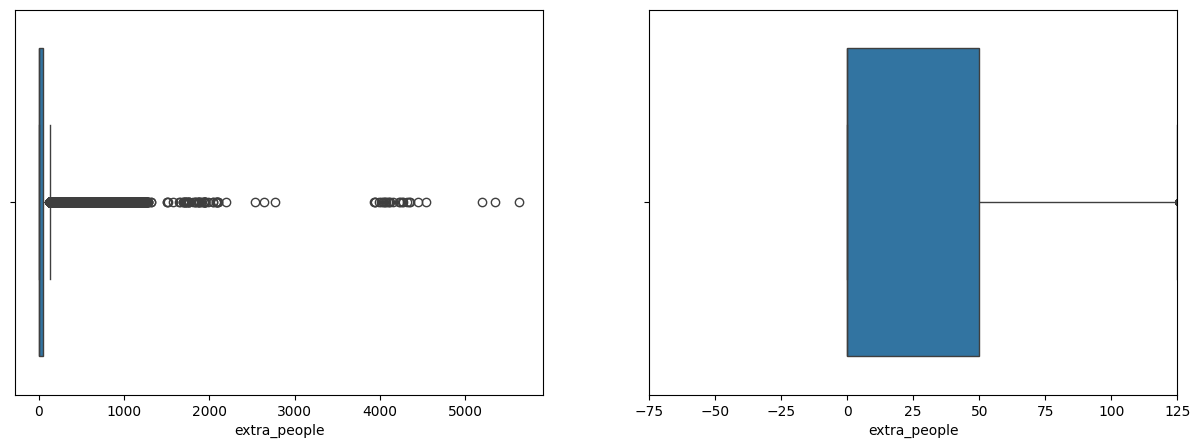

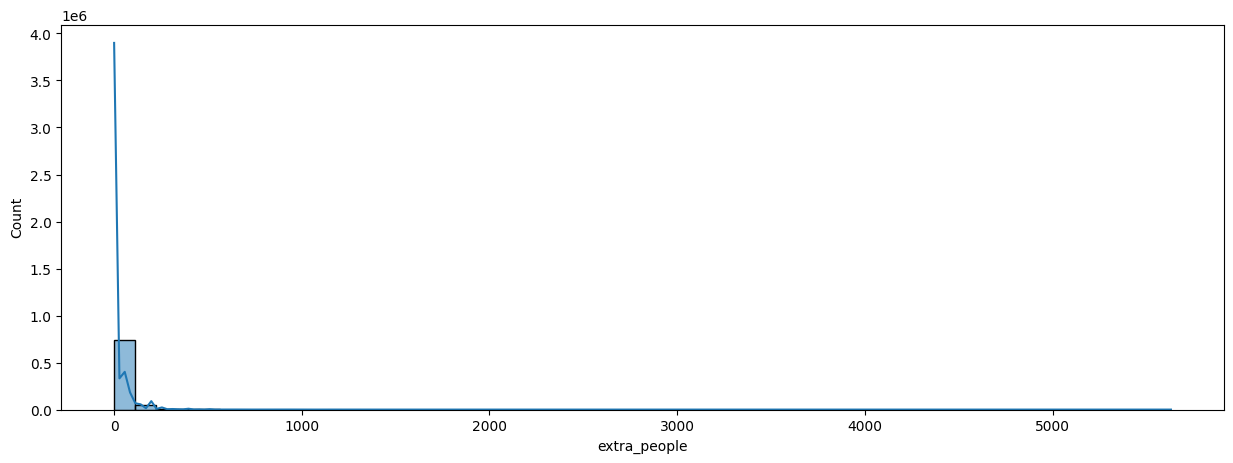

In [20]:
diagrama_caixa('extra_people')
histograma('extra_people')

In [21]:
df_base_airbnb, linhas_removidas = remove_outliers('extra_people')
print(f"{linhas_removidas} linhas foram removidas do dataframe devido a outliers da feature(coluna).")

59194 linhas foram removidas do dataframe devido a outliers da feature(coluna).


<b>[Decisão]</b> --> Através de uma análise feita optou-se por retirar as linhas em que os preços estão acima do limite superior pois são valores referentes fora do que é razoável para os imóveis que são o foco do modelo.

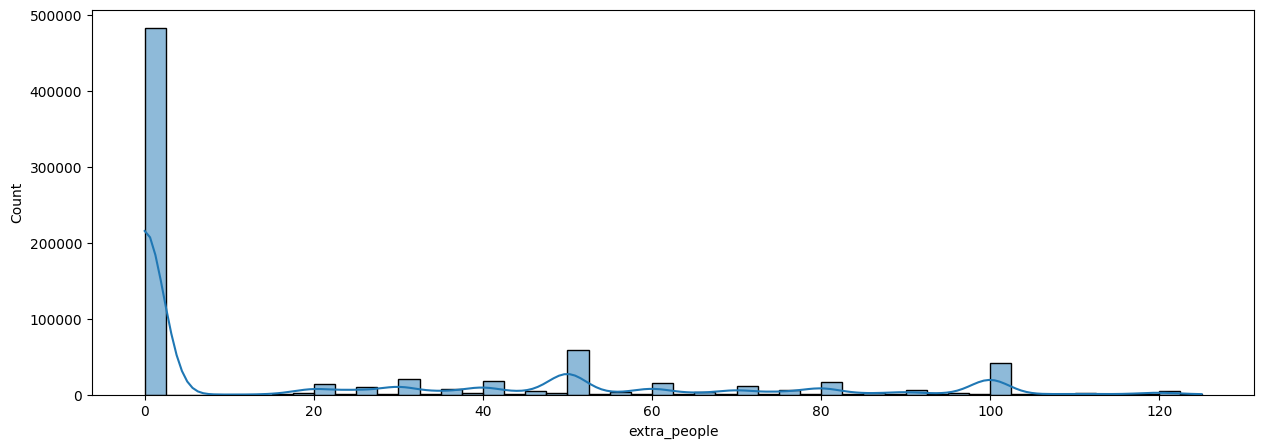

In [22]:
histograma('extra_people')

## Analise de Valores Numéricos Discretos

### Estas são as features que serão analisadas abaixo:

- host_listings_count -------------> float64 <br>
- accommodates -------------> int64 <br>
- bathrooms -------------> float64 <br>
- bedrooms  -------------> float64 <br>
- beds -------------> float64 <br>
- guests_included -------------> int64 <br>
- minimum_nights -------------> int64 <br>
- maximum_nights -------------> int64 <br>
- number_of_reviews -------------> int64 <br>
- mes -------------> int64 <br>
- ano -------------> int64 <br>

### Analisando a feature (coluna) de Quantidade de Imóveis Listados no Airbnb (host_listings_count)

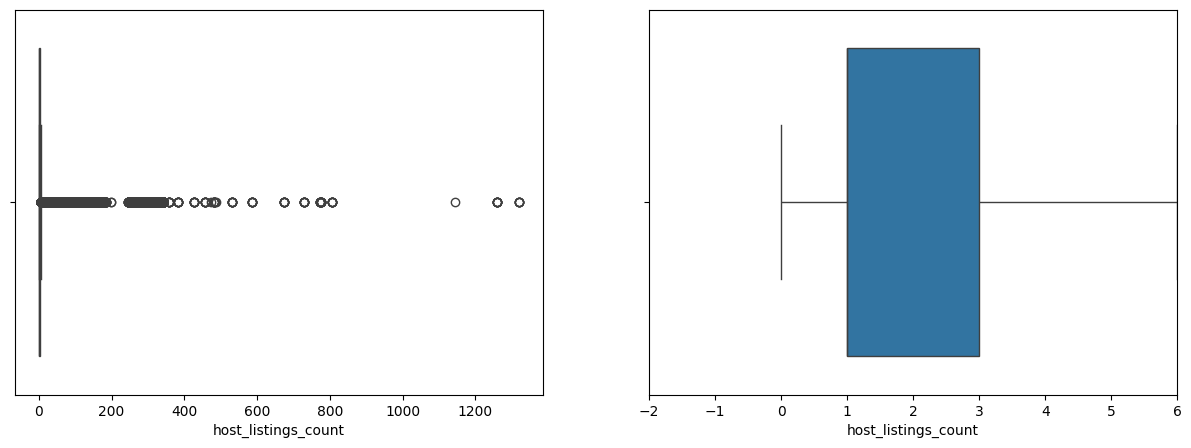

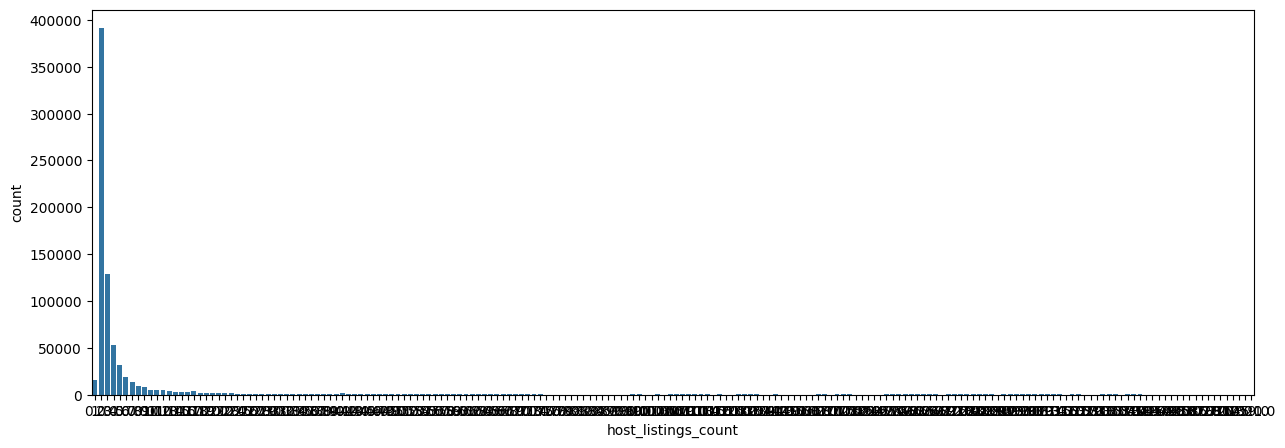

In [23]:
diagrama_caixa('host_listings_count')
barras('host_listings_count')

<b>[Decisão]</b> - Ficou decidido excluir os outliers para desconsiderar gestores de imóveis, mobiliárias. O foco do modelo são pessoas físicas.

97723 linhas foram removidas do dataframe devido a outliers da feature(coluna).


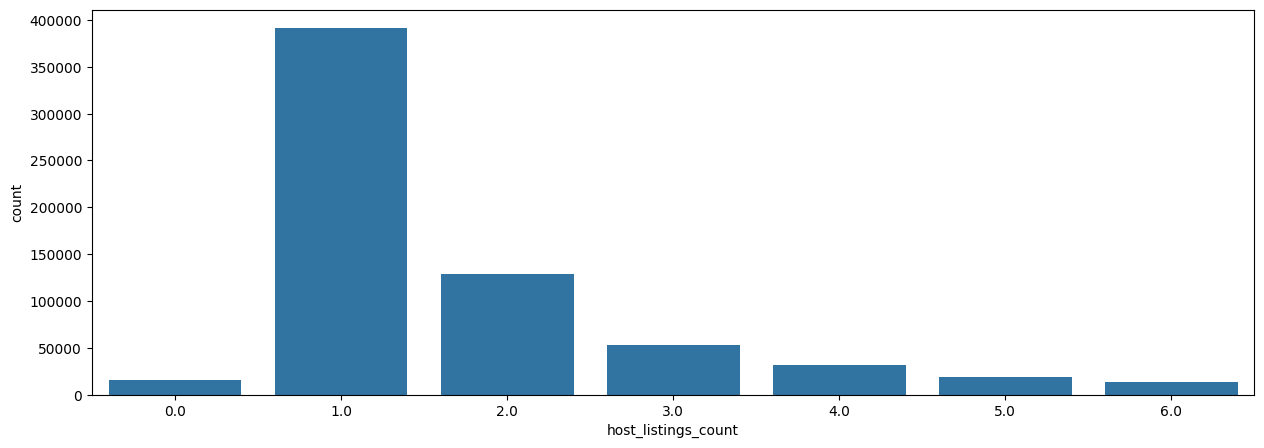

In [24]:
df_base_airbnb, linhas_removidas = remove_outliers('host_listings_count')
print(f"{linhas_removidas} linhas foram removidas do dataframe devido a outliers da feature(coluna).")
barras('host_listings_count')

### Analisando a feature (coluna) de Capacidade de Hospedes (accommodates)

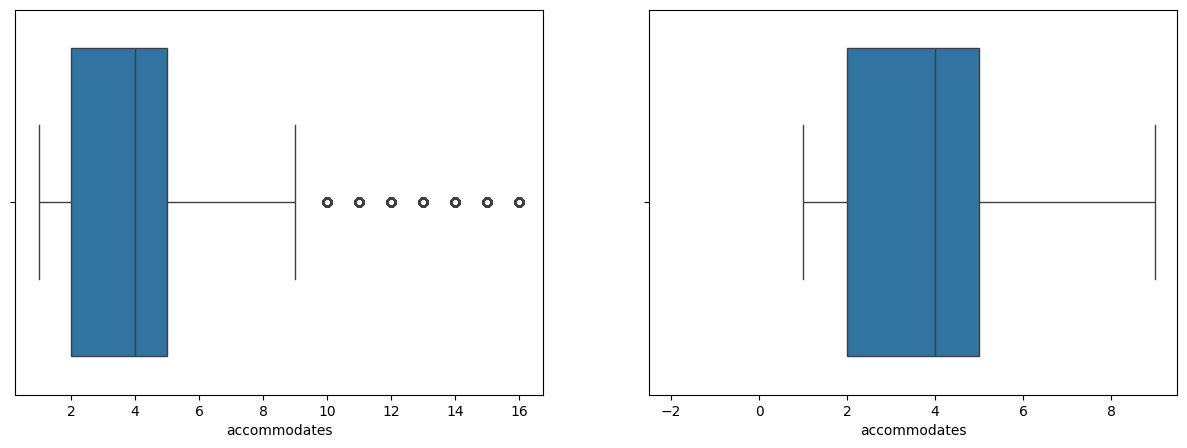

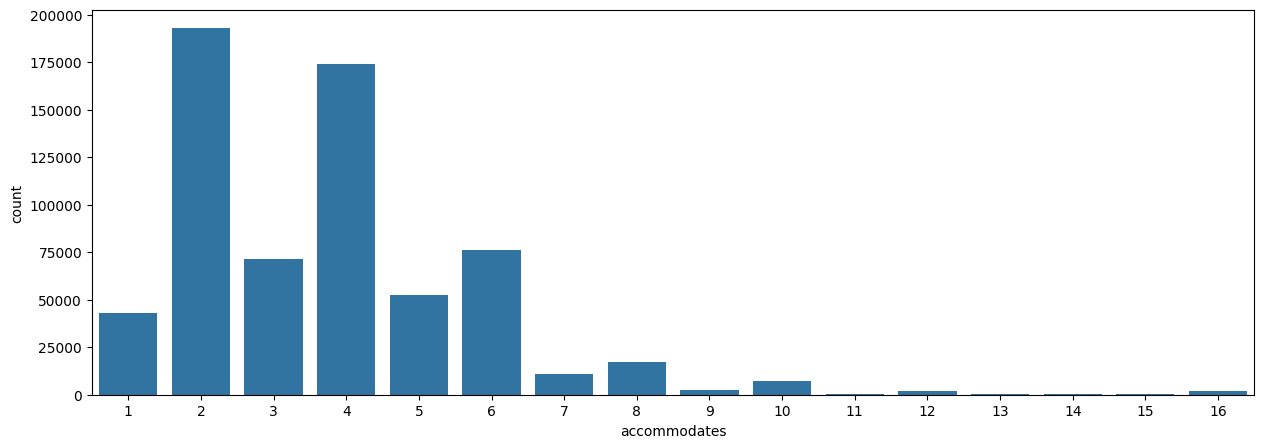

In [25]:
diagrama_caixa('accommodates')
barras('accommodates')

<b>[Decisão]</b> - A decisão foi de retirar os outliers para seguir o padrão das escolhas anteriores. Na verdade aqui é opcional e arbitrário. Pode ser um motivo para aperfeiçoamento do modelo ao final.

13146 linhas foram removidas do dataframe devido a outliers da feature(coluna).


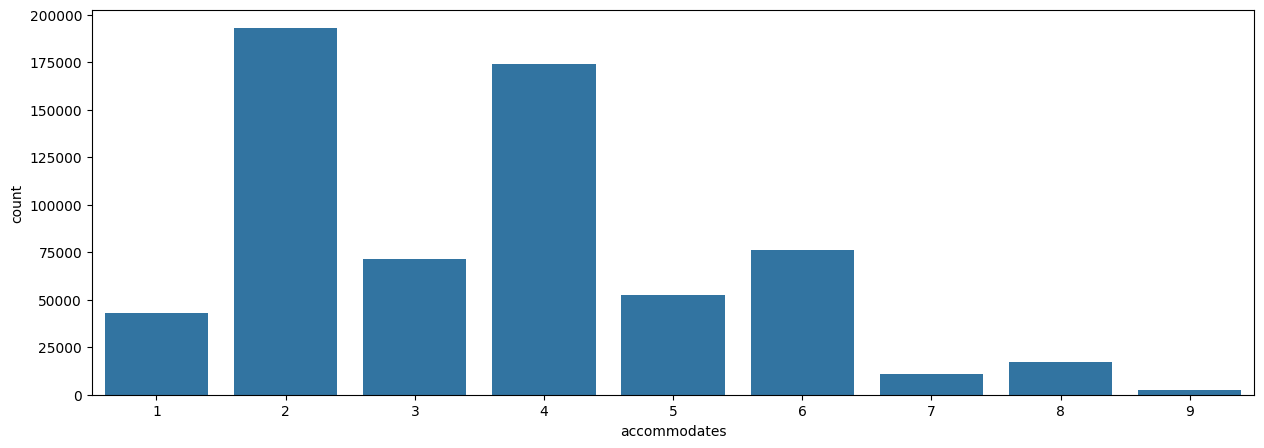

In [26]:
df_base_airbnb, linhas_removidas = remove_outliers('accommodates')
print(f"{linhas_removidas} linhas foram removidas do dataframe devido a outliers da feature(coluna).")
barras('accommodates')

### Analisando a feature (coluna) de Quantidade de Banheiros (bathrooms)

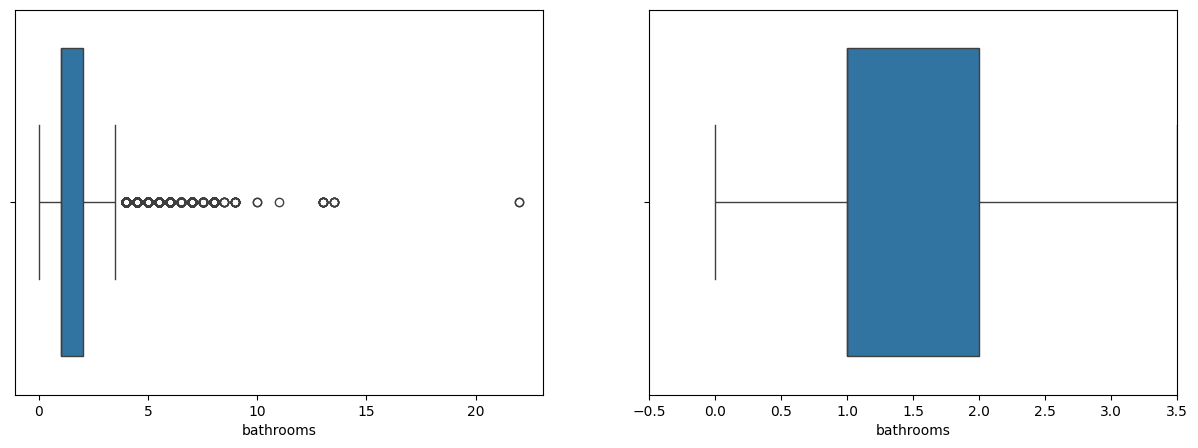

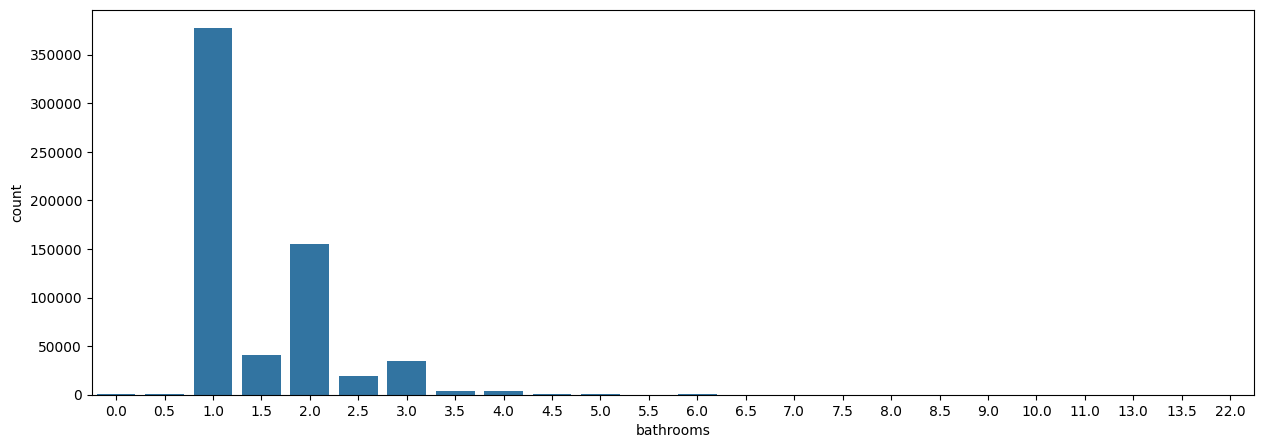

In [27]:
diagrama_caixa('bathrooms')
barras('bathrooms')

<b>[Decisão]</b> - A decisão aqui foi de retirar os outliers por serem referentes a casos de imóveis de luxo.

6894 linhas foram removidas do dataframe devido a outliers da feature(coluna).


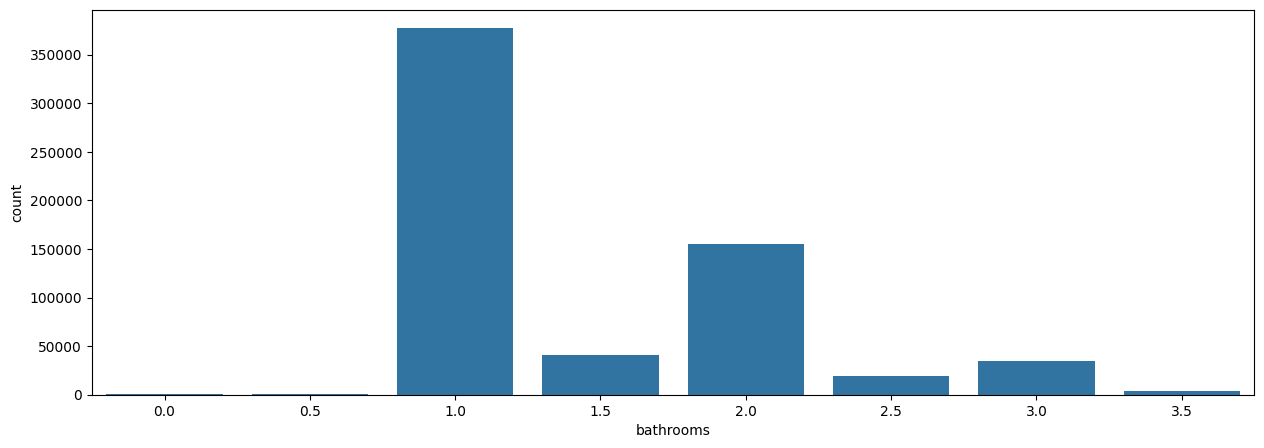

In [28]:
df_base_airbnb, linhas_removidas = remove_outliers('bathrooms')
print(f"{linhas_removidas} linhas foram removidas do dataframe devido a outliers da feature(coluna).")
barras('bathrooms')

### Analisando a feature (coluna) de Quantidade de Quartos (bedrooms)

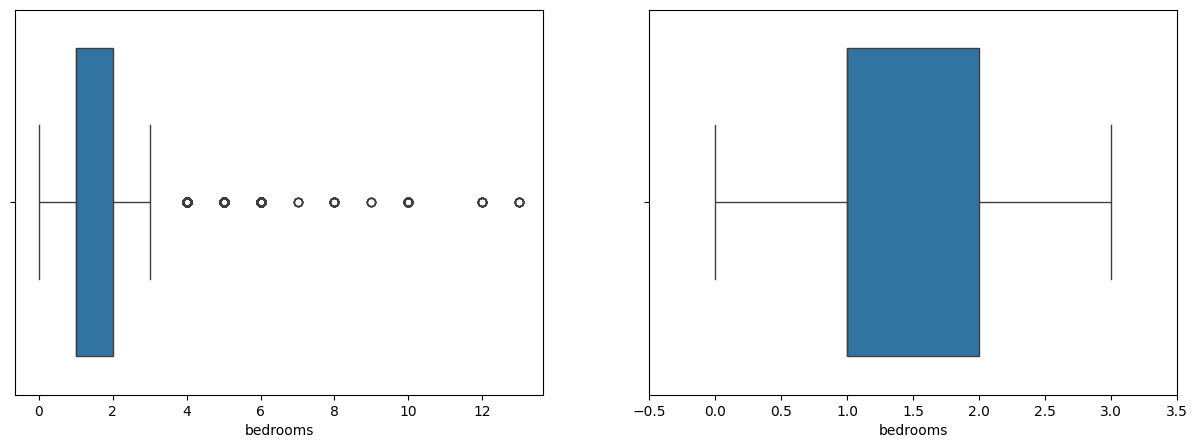

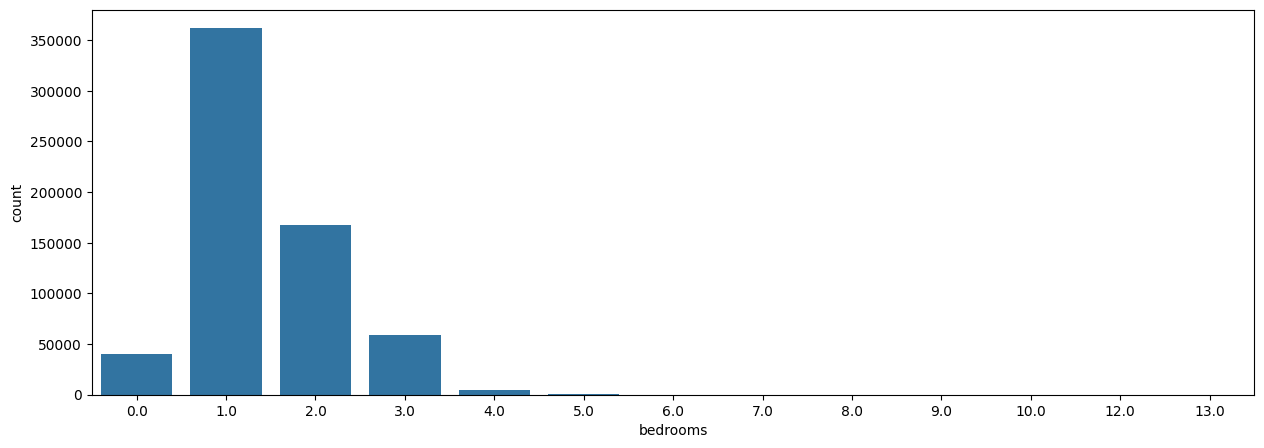

In [29]:
diagrama_caixa('bedrooms')
barras('bedrooms')

<b>[Decisão]</b> - A decisão aqui foi de retirar os outliers por serem referentes a casos de imóveis de luxo.

5482 linhas foram removidas do dataframe devido a outliers da feature(coluna).


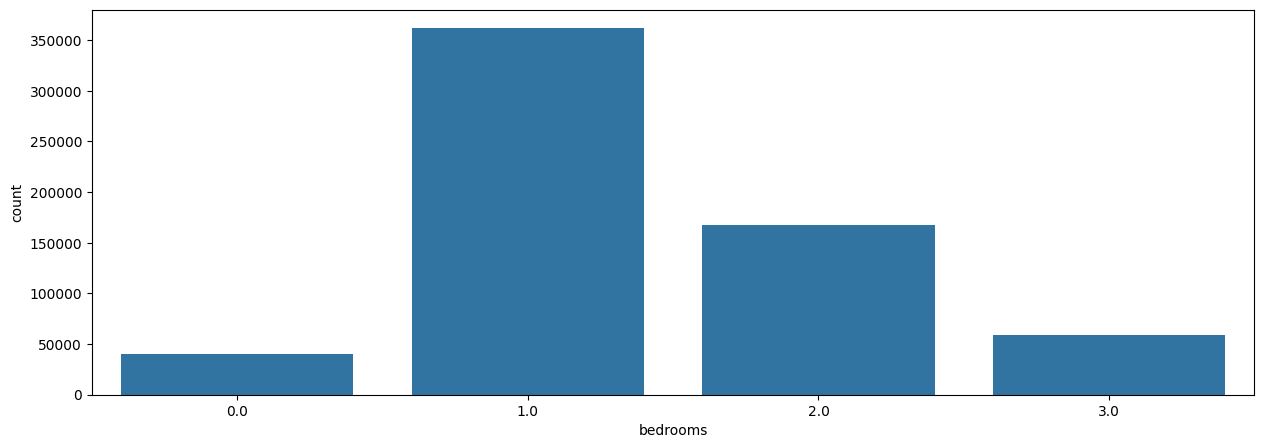

In [30]:
df_base_airbnb, linhas_removidas = remove_outliers('bedrooms')
print(f"{linhas_removidas} linhas foram removidas do dataframe devido a outliers da feature(coluna).")
barras('bedrooms')

### Analisando a feature (coluna) de Quantidade de Camas (beds)

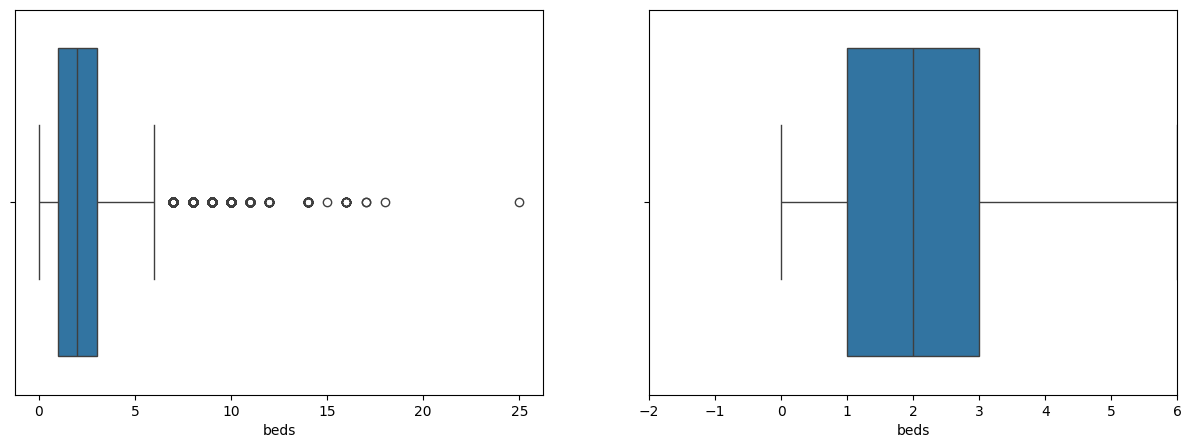

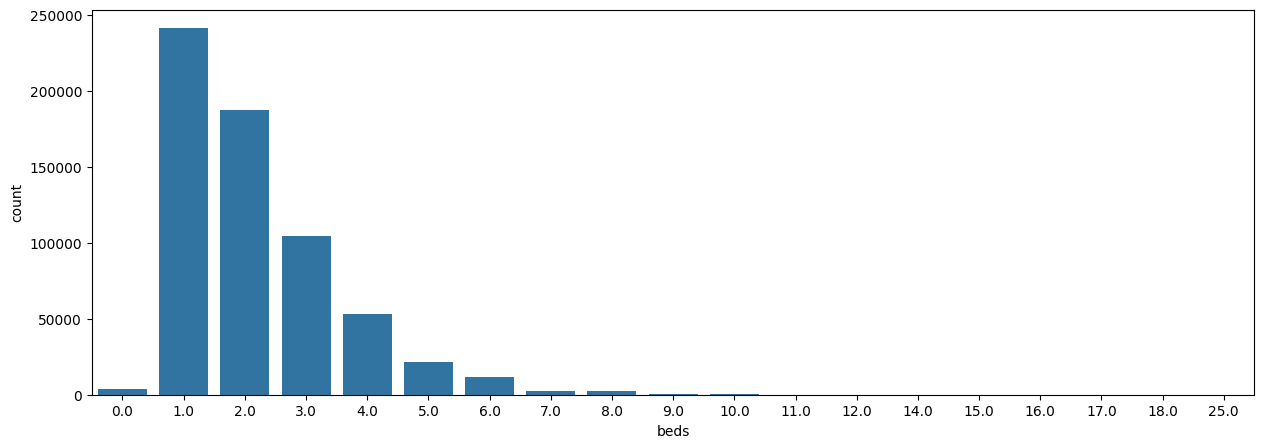

In [31]:
diagrama_caixa('beds')
barras('beds')

<b>[Decisão]</b> - A decisão aqui foi de retirar os outliers por serem referentes a casos de imóveis de luxo.

5622 linhas foram removidas do dataframe devido a outliers da feature(coluna).


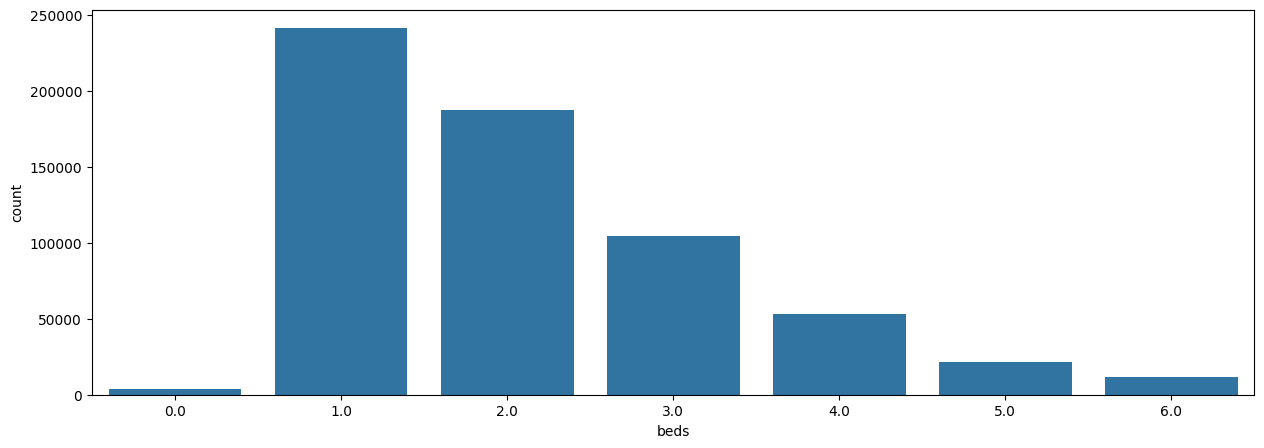

In [32]:
df_base_airbnb, linhas_removidas = remove_outliers('beds')
print(f"{linhas_removidas} linhas foram removidas do dataframe devido a outliers da feature(coluna).")
barras('beds')

### Analisando a feature (coluna) de Quantidade de Pessoas Inclusas no Preço (guest_included)

C:\Users\igor_\AppData\Local\Temp\ipykernel_1328\1641408426.py:4: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax2.set_xlim(limites(coluna))


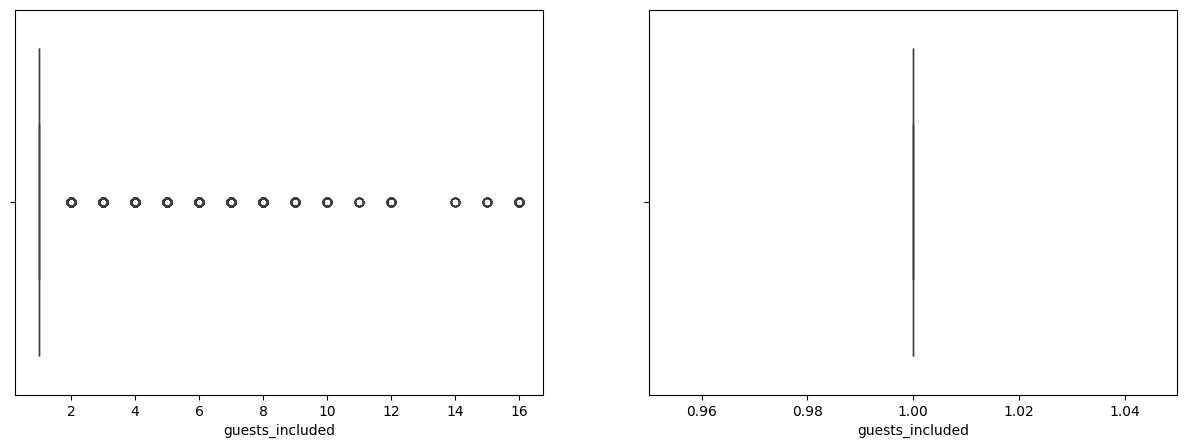

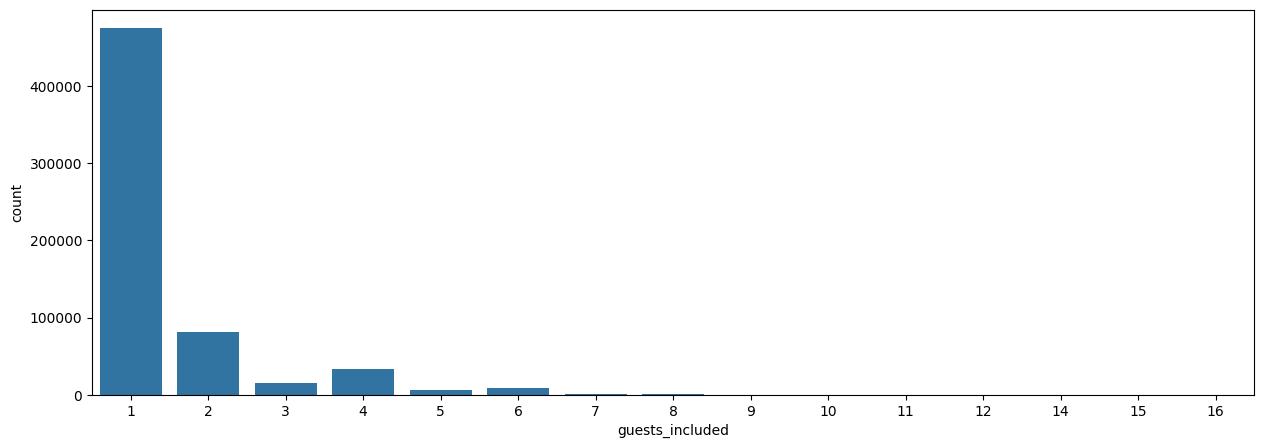

In [33]:
diagrama_caixa('guests_included')
barras('guests_included')

<b>[Decisão]</b> - Vamos remover a feature da análise. Parece que os usuários do Airbnb usam muito os valores padrões do Airbnb para a coluna da análise. Isso pode levar nosso modelo a ser enviesado.

In [34]:
df_base_airbnb.drop(columns='guests_included', axis=1, inplace=True)
print("Coluna 'guests_included' excluída do dataframe.")

Coluna 'guests_included' excluída do dataframe.


In [35]:
df_base_airbnb.shape

(622366, 22)

### Analisando a feature (coluna) de Quantidade Minima de Diárias (minimum_nights)

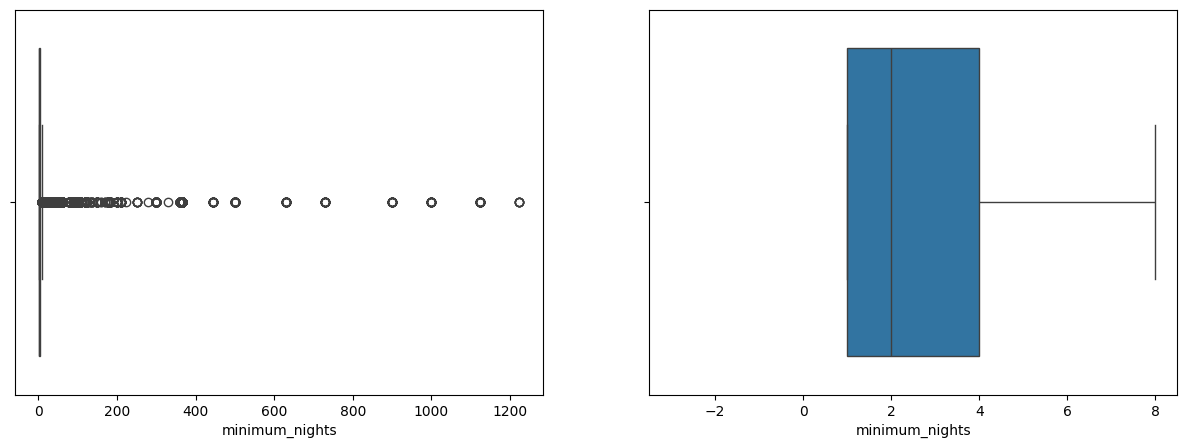

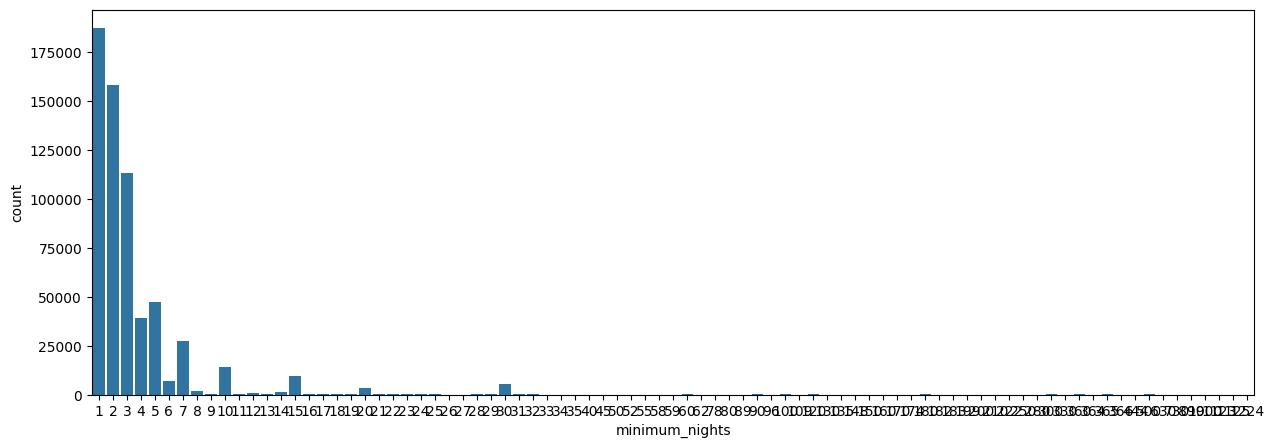

In [36]:
diagrama_caixa('minimum_nights')
barras('minimum_nights')

<b>[Decisão]</b> - Outliers retirados.

40383 linhas foram removidas do dataframe devido a outliers da feature(coluna).


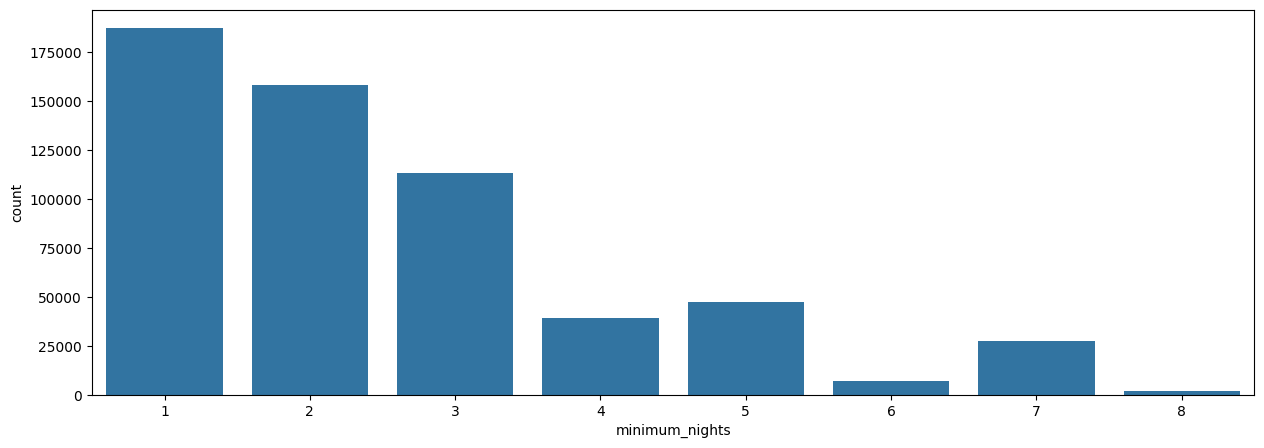

In [37]:
df_base_airbnb, linhas_removidas = remove_outliers('minimum_nights')
print(f"{linhas_removidas} linhas foram removidas do dataframe devido a outliers da feature(coluna).")
barras('minimum_nights')

### Analisando a feature (coluna) de Quantidade Máxima de Diárias (maximum_nights)

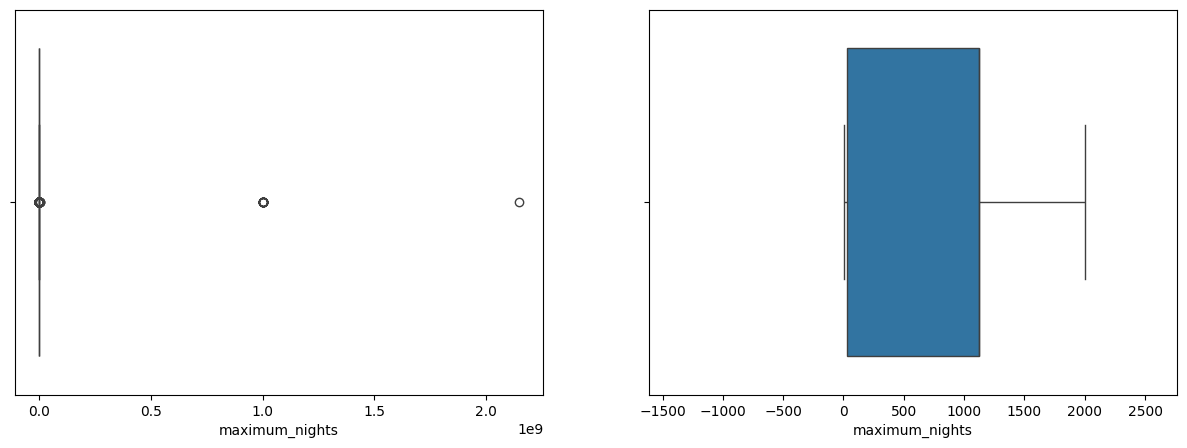

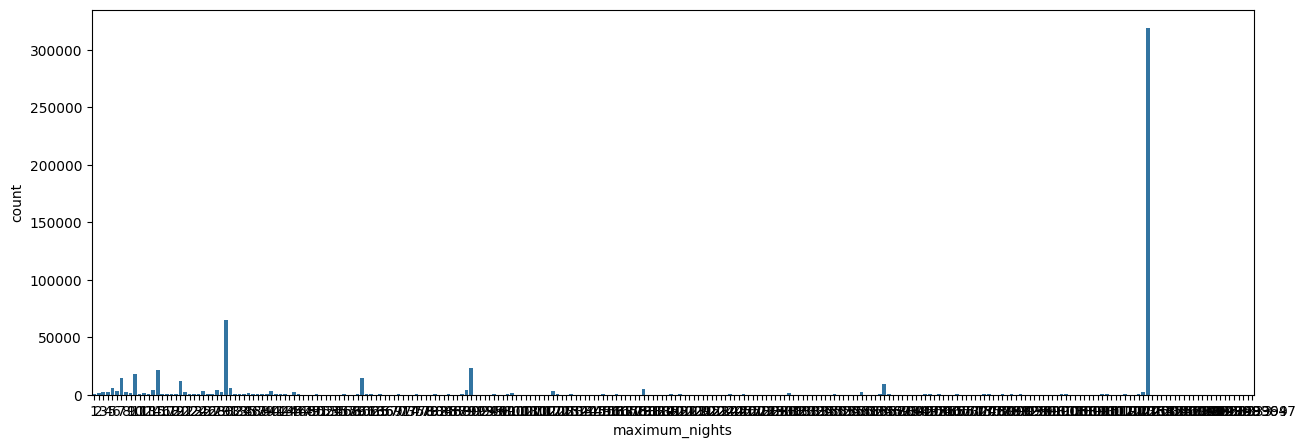

In [38]:
diagrama_caixa('maximum_nights')
barras('maximum_nights')

<b>[Decisão]</b> - Vamos remover a feature da análise. Parece que os usuários do Airbnb não preenchem corretamente este campo vide a enorme concentração por volta de 2000. Isso pode levar nosso modelo a ser enviesado.

In [39]:
df_base_airbnb.drop(columns='maximum_nights', axis=1, inplace=True)
print("Coluna 'maximum_nights' excluída do dataframe.")
df_base_airbnb.shape

Coluna 'maximum_nights' excluída do dataframe.


(581983, 21)

### Analisando a feature (coluna) de Número de Reviews (number_of_reviews)

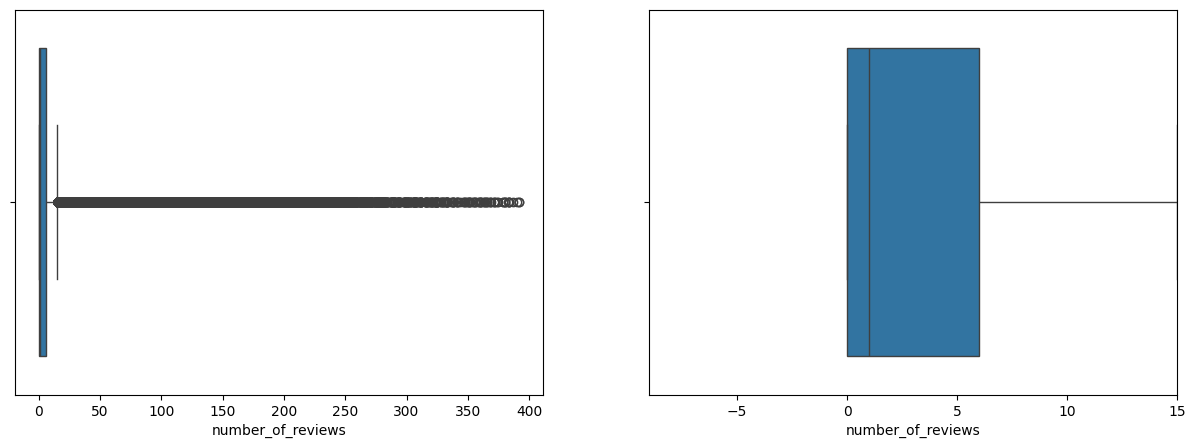

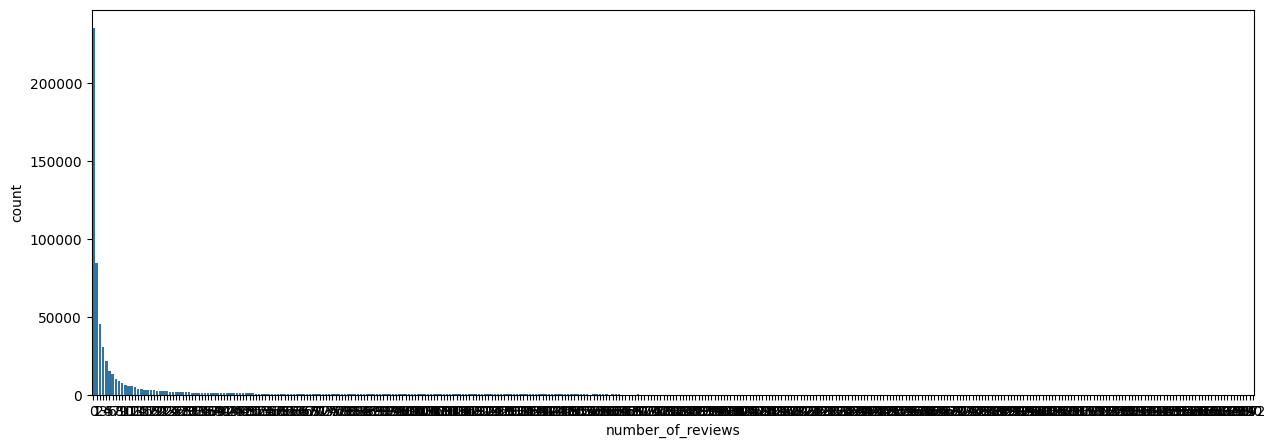

In [40]:
diagrama_caixa('number_of_reviews')
barras('number_of_reviews')

<b>[Decisão]</b> - A decisão foi de retirar a coluna pois o modelo é inicialmente pensado em pessoas buscando preco justo de aluguel ou pessoas que querem disponibilizar o imóvel pela primeira vez na plataforma.

In [41]:
df_base_airbnb.drop(columns='number_of_reviews', axis=1, inplace=True)
print("Coluna 'maximum_nights' excluída do dataframe.")
df_base_airbnb.shape

Coluna 'maximum_nights' excluída do dataframe.


(581983, 20)

## Analise de Colunas com Valores em Texto

Precisamos analisar os valores em texto e entender se vale a pena transformá-los em categorias para o nosso modelo. Para isso, vamos contar quantos tipos existem e quantas vezes aparecem no dataframe.

### Analisando a feature (coluna) de Tipo de Propriedade (property_type)

In [42]:
print(df_base_airbnb['property_type'].value_counts()) # soma a quantidade de ocorrências de cada tipo de propriedade

property_type
Apartment                 458354
House                      51387
Condominium                26456
Serviced apartment         12671
Loft                       12352
Guest suite                 3621
Bed and breakfast           3472
Hostel                      2665
Guesthouse                  2155
Other                       1957
Villa                       1294
Townhouse                    969
Aparthotel                   693
Chalet                       481
Earth house                  468
Tiny house                   457
Boutique hotel               447
Hotel                        376
Casa particular (Cuba)       298
Cottage                      230
Bungalow                     207
Dorm                         185
Cabin                        141
Nature lodge                 124
Castle                        80
Treehouse                     76
Island                        54
Boat                          53
Hut                           40
Campsite                     

<b>[Decisão]</b> - Juntar tipos com menos de 2000 ocorrências em uma única categoria 'Other'

In [43]:
for tipo in df_base_airbnb['property_type'].value_counts().index: # percorre cada tipo de propriedade do dataframe 
    if df_base_airbnb['property_type'].value_counts()[tipo] < 2000:
        df_base_airbnb.loc[df_base_airbnb['property_type'] == tipo, 'property_type'] = 'Other' 
        # substitui, na coluna property_type o tipo de propriedade por 'Other' se a quantidade de ocorrências for menor que 2000
print(df_base_airbnb['property_type'].value_counts())

property_type
Apartment             458354
House                  51387
Condominium            26456
Serviced apartment     12671
Loft                   12352
Other                   8850
Guest suite             3621
Bed and breakfast       3472
Hostel                  2665
Guesthouse              2155
Name: count, dtype: int64


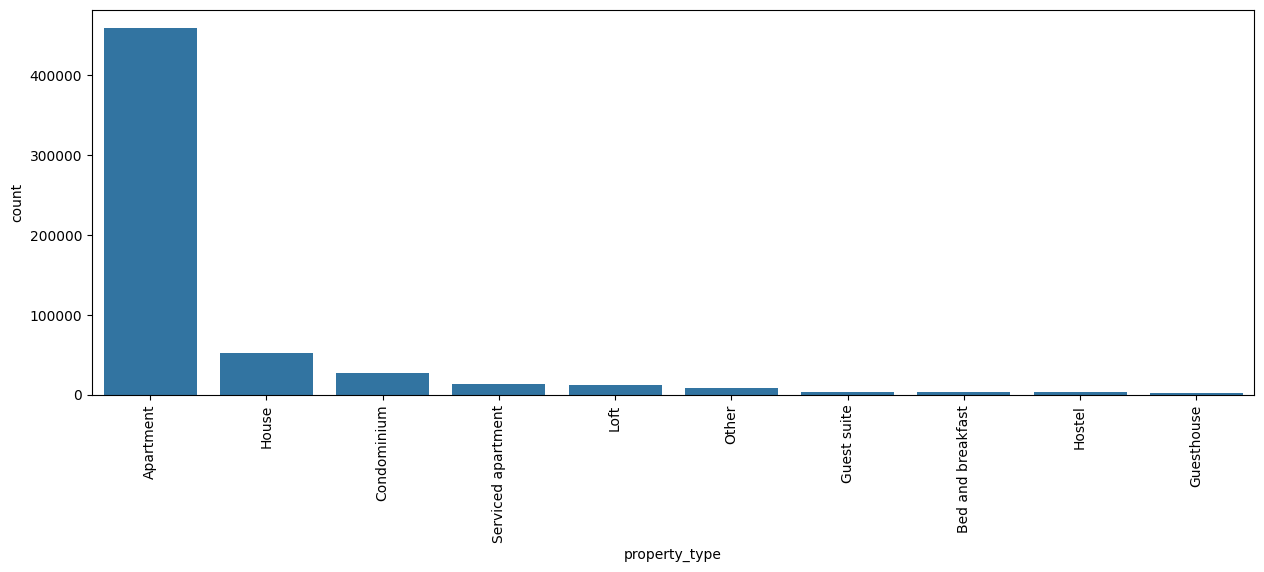

In [44]:
plt.figure(figsize=(15, 5))
oi = sns.countplot(x='property_type', data=df_base_airbnb, order=df_base_airbnb['property_type'].value_counts().index)
oi.tick_params(axis='x',rotation=90)

### Analisando a feature (coluna) de Tipo de Quarto (room_type)

In [45]:
print(df_base_airbnb['room_type'].value_counts()) # soma a quantidade de ocorrências de cada tipo de quarto

room_type
Entire home/apt    372443
Private room       196859
Shared room         11714
Hotel room            967
Name: count, dtype: int64


<b>[Decisão]</b> - Como existem poucas categorias e elas estão relativamente bem distribuidas, deixei inalterada.

### Analisando a feature (coluna) de Tipo de Cama (bed_type)

In [46]:
print(df_base_airbnb['bed_type'].value_counts()) # soma a quantidade de ocorrências de cada tipo de cama

bed_type
Real Bed         570643
Pull-out Sofa      8055
Futon              1634
Airbed             1155
Couch               496
Name: count, dtype: int64


<b>[Decisão]</b> - Juntar valores tipos com menos de 10000 ocorrências em uma única categoria 'Other Bed Type'

In [47]:
for tipo in df_base_airbnb['bed_type'].value_counts().index: # percorre cada tipo de cama do dataframe 
    if df_base_airbnb['bed_type'].value_counts()[tipo] < 10000:
        df_base_airbnb.loc[df_base_airbnb['bed_type'] == tipo, 'bed_type'] = 'Other_Bed_Type' 
        # substitui, na coluna bed_type o tipo de propriedade por 'Other Bed Type' se a quantidade de ocorrências for menor que 10000
print(df_base_airbnb['bed_type'].value_counts())

bed_type
Real Bed          570643
Other_Bed_Type     11340
Name: count, dtype: int64


### Analisando a feature (coluna) de Política de Cancelamento (cancellation_policy)

In [48]:
print(df_base_airbnb['cancellation_policy'].value_counts()) # soma a quantidade de ocorrências de cada política de cancelamento

cancellation_policy
flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
strict                           9696
super_strict_60                   135
super_strict_30                    32
Name: count, dtype: int64


<b>[Decisão]</b> - Juntar valores tipos com menos de 10000 ocorrências em uma única categoria 'Strict'

In [49]:
for tipo in df_base_airbnb['cancellation_policy'].value_counts().index: # percorre cada tipo de cama do dataframe 
    if df_base_airbnb['cancellation_policy'].value_counts()[tipo] < 10000:
        df_base_airbnb.loc[df_base_airbnb['cancellation_policy'] == tipo, 'cancellation_policy'] = 'strict' 
        # substitui, na coluna cancellation_policy o tipo de politica de cancelamento por 'strict' se a quantidade de ocorrências for menor que 10000
print(df_base_airbnb['cancellation_policy'].value_counts())

cancellation_policy
flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
strict                           9863
Name: count, dtype: int64


### Analisando a feature (coluna) de Comodidades (ammenities)

<b>[Decisão]</b> - Como a coluna de comodidades é composta de uma lista em cada linha, iremos considerar o número de itens de cada lista para nossa análise. Acredito que existe uma relação diretamente proporcional entre o preço cobrado pelo host e o número de comodidades disponíveis.

In [50]:
df_base_airbnb['n_amenities'] = df_base_airbnb['amenities'].str.split(',').apply(lambda x: len(x)) 
# cria uma nova coluna 'n_ammenities' que conta a quantidade de amenidades em cada registro
df_base_airbnb.drop(columns='amenities', axis=1, inplace=True) # remove a coluna 'amenities' do dataframe
df_base_airbnb.shape

(581983, 20)

Agora vamos analisar a nova coluna  na busca de outliers.

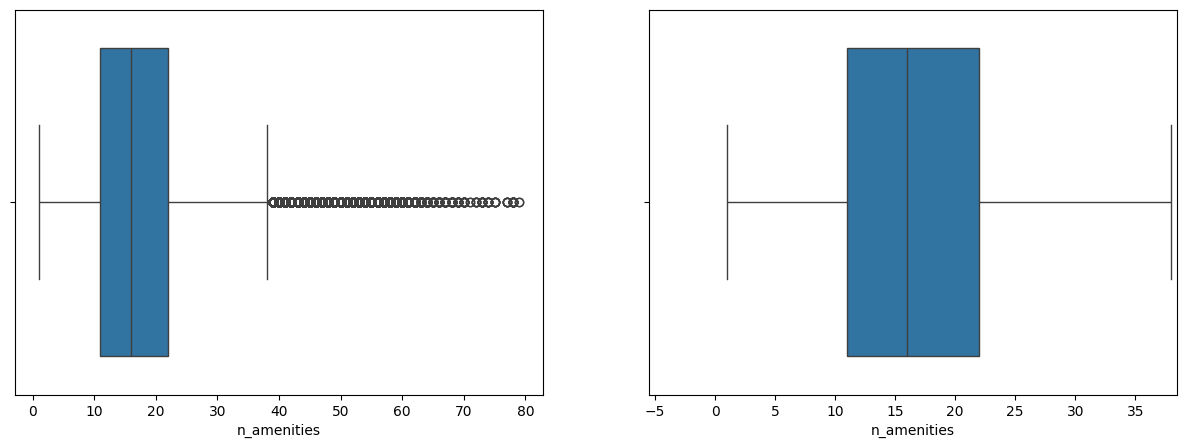

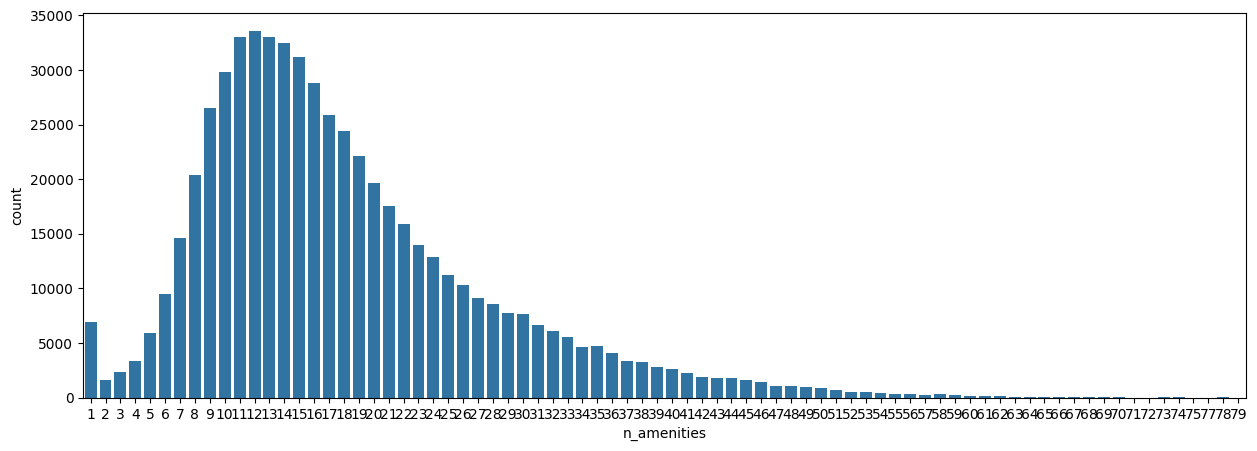

In [51]:
diagrama_caixa('n_amenities')
barras('n_amenities')

<b>[Decisão]</b> - Vou retirar os outliers pois podem ser pessoas que sobrevalorizaram seu imóvel ou casas muito grandes, que não são o foco do modelo.

24343 linhas foram removidas do dataframe devido a outliers da feature(coluna).


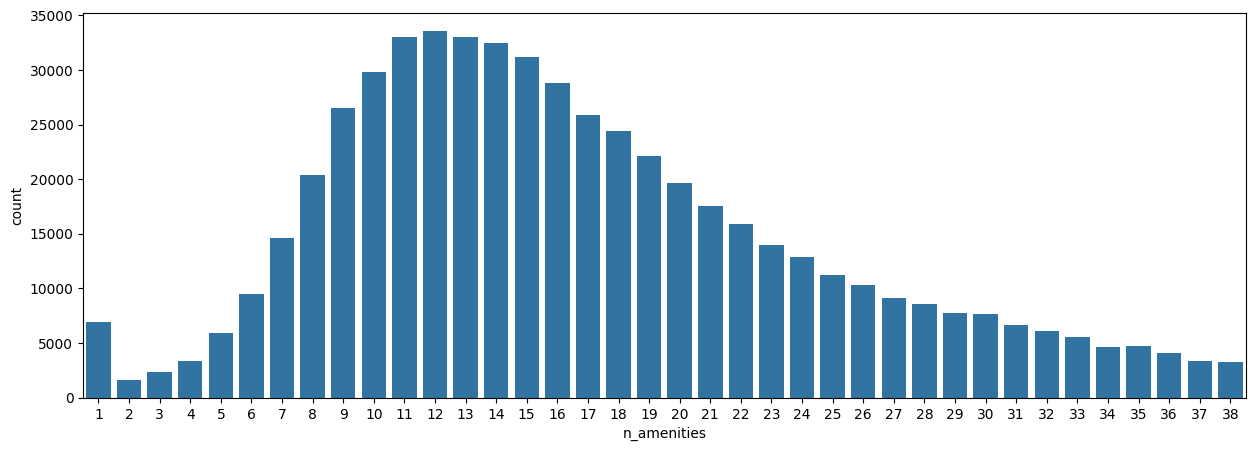

In [52]:
df_base_airbnb, linhas_removidas = remove_outliers('n_amenities')
print(f"{linhas_removidas} linhas foram removidas do dataframe devido a outliers da feature(coluna).")
barras('n_amenities')

## Visualização de Mapa da Propriedades

In [53]:
amostra = df_base_airbnb.sample(n=50000)
centro_mapa = {'lat':amostra.latitude.mean(), 'lon':amostra.longitude.mean()}
mapa = px.density_map(amostra, lat='latitude', lon='longitude',z='price', radius=5,
                        center=centro_mapa, zoom=10,
                        map_style='open-street-map',)
mapa.show()

### Encoding

In [54]:
df_base_airbnb.head()

,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,extra_people,minimum_nights,instant_bookable,is_business_travel_ready,cancellation_policy,mes,ano,n_amenities
1,t,2.0,-22.965919,-43.178962,Condominium,Entire home/apt,5,1.0,2.0,2.0,Real Bed,270.0,51.0,4,t,f,strict,4,2018,25
3,f,3.0,-22.977117,-43.190454,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,161.0,45.0,4,f,f,strict,4,2018,14
4,t,1.0,-22.983024,-43.214270,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,222.0,68.0,2,t,f,strict,4,2018,16
5,t,1.0,-22.988165,-43.193588,Apartment,Entire home/apt,3,1.5,1.0,2.0,Real Bed,308.0,86.0,2,f,f,strict,4,2018,30
6,t,1.0,-22.981269,-43.190457,Loft,Entire home/apt,2,1.0,1.0,2.0,Real Bed,219.0,80.0,3,t,f,strict,4,2018,30


Precisamos manipular os dados de texto para que se tornem números e o modelo consiga treinar de maneira eficiente.

Para isso, vamos analisar e manipular as colunas que têm variaveis booleanas e colunas que são compostas de variáveis categóricas.

<b>Colunas com Variáveis Booleanas</b> <br> 

- True or False serão substituidos por 1 or 0.

<b>Colunas com Variáveis Categóricas</b> <br>

- Serão manipuladas por o método de enconding de Variáveis Dummies. <br>
- Este processo se dá em separar todas as possibilidades de valor para a variavel categórica em análise e transformá-los em novas colunas que receberão o valor 1 quando na mesma linha da coluna analisada constar o valor categórico designador da nova coluna e 0 quando for um valor diferente.

In [55]:
print(df_base_airbnb.columns)

Index(['host_is_superhost', 'host_listings_count', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'extra_people', 'minimum_nights',
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'mes', 'ano', 'n_amenities'],
      dtype='object')


In [56]:
colunas_booleanas = ['host_is_superhost', 'instant_bookable', 'is_business_travel_ready']
df_base_airbnb_cod =  df_base_airbnb.copy() # Cria uma cópia do dataframe original para evitar alterações indesejadas
for coluna in colunas_booleanas:
    df_base_airbnb_cod[coluna] = df_base_airbnb_cod[coluna].map({'t': 1, 'f': 0})
    # Converte as colunas booleanas de 't' e 'f' para 1 e 0

In [57]:
colunas_categoricas = ['property_type', 'room_type', 'bed_type', 'cancellation_policy']
df_base_airbnb_cod = pd.get_dummies(df_base_airbnb_cod, columns=colunas_categoricas, dtype=float)
# Converte as colunas categóricas em variáveis dummy, removendo a primeira categoria para evitar a armadilha da variável fictícia

In [58]:
display(df_base_airbnb_cod.head())

,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,extra_people,...,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Other_Bed_Type,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period
1,1,2.0,-22.965919,-43.178962,5,1.0,2.0,2.0,270.0,51.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,3.0,-22.977117,-43.190454,3,1.0,1.0,2.0,161.0,45.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1,1.0,-22.983024,-43.214270,3,1.0,1.0,2.0,222.0,68.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,1,1.0,-22.988165,-43.193588,3,1.5,1.0,2.0,308.0,86.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,1,1.0,-22.981269,-43.190457,2,1.0,1.0,2.0,219.0,80.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Modelo de Previsão

<b>[Decisão]</b>

Para a avaliação de perfomance do modelo, serão utilizadas as métricas do R² e Erro Quadrático Médio (RSME). Elas são um bom balanço entre a medida de sucesso e o quanto erra o modelo.

<p>R² → mede o quanta variância do valor real o modelo conseguiu explicar.</p>
<p>RSME → mede a média dos erros. Penaliza fortemente outliers.</p>

Definindo a função de avaliação de modelo.

In [59]:
def avaliar_modelo(nome_modelo, y_teste, y_pred):
    """
    Avalia o desempenho do modelo com base no R² e no erro quadrático médio (RMSE).
    """
    r2 = r2_score(y_teste, y_pred)
    rmse = np.sqrt(mean_squared_error(y_teste, y_pred))
    
    return f'Modelo: {nome_modelo} --> R² = {r2} , RMSE = {rmse}'

Os modelos escolhidos para teste são: Regressão Linear, Random Forest e Extra Trees.

In [60]:
modelo_rl = LinearRegression()
modelo_rf = RandomForestRegressor()
modelo_et = ExtraTreesRegressor()


modelos = {'Regressão Linear': modelo_rl,
           'Random Forest': modelo_rf,
           'Extra Trees': modelo_et}

x = df_base_airbnb_cod.drop(columns='price', axis=1)  # Variáveis independentes
y = df_base_airbnb_cod['price']  # Variável dependente

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=27) # testar com test_size=0.2 para 20% de teste

for nome_modelo, modelo in modelos.items(): # modelos.items() retorna uma lista de tuplas (nome_modelo, modelo)
    # Treino
    modelo.fit(x_train, y_train)  # Treina o modelo
    # Teste
    y_pred = modelo.predict(x_test)  # Faz previsões no conjunto de teste
    # Avaliação
    print(avaliar_modelo(nome_modelo, y_test, y_pred))  # Avalia o modelo

Modelo: Regressão Linear --> R² = 0.33109620895476055 , RMSE = 216.6372711979896
Modelo: Random Forest --> R² = 0.9735537889433714 , RMSE = 43.075772804643066
Modelo: Extra Trees --> R² = 0.9754900992289096 , RMSE = 41.468862660730885


### Análise do Melhor Modelo

Resultados: <br>
- <b>Modelo: Regressão Linear</b> --> R² = 0.33109620895476055 , RMSE = 216.6372711979896 <br>
- <b>Modelo: Random Forest</b> --> R² = 0.9734631584049327 , RMSE = 43.149519502824724 <br>
- <b>Modelo: Extra Trees</b> --> R² = 0.9756440285110564 , RMSE = 41.33843932454885 <br><br>
Segundo os resultados das métricas -> Extra Trees é o melhor modelo <br>
Considerando o tempo de treino e teste para cada modelo -> não houve grande diferença entre os dois melhores modelos (Extra Trees e Random Forest)

### Ajustes e Melhorias no Melhor Modelo

In [62]:
df_importancia_cada_coluna = pd.DataFrame(modelo_et.feature_importances_, index=x_train.columns) 
# Cria um DataFrame com as importâncias das colunas(features) do modelo Extra Trees Regressor, que foi avaliado o melhor.
df_importancia_cada_coluna = df_importancia_cada_coluna.sort_values(by=0, ascending=False)  
# Ordena as importâncias em ordem decrescente
display(df_importancia_cada_coluna)

,0
bedrooms,0.106560
latitude,0.104712
longitude,0.101176
n_amenities,0.088643
extra_people,0.087060
accommodates,0.075278
bathrooms,0.074791
room_type_Entire home/apt,0.065011
minimum_nights,0.064833
beds,0.053023


Text(0.5, 1.0, 'Importância de cada coluna no modelo Extra Trees')

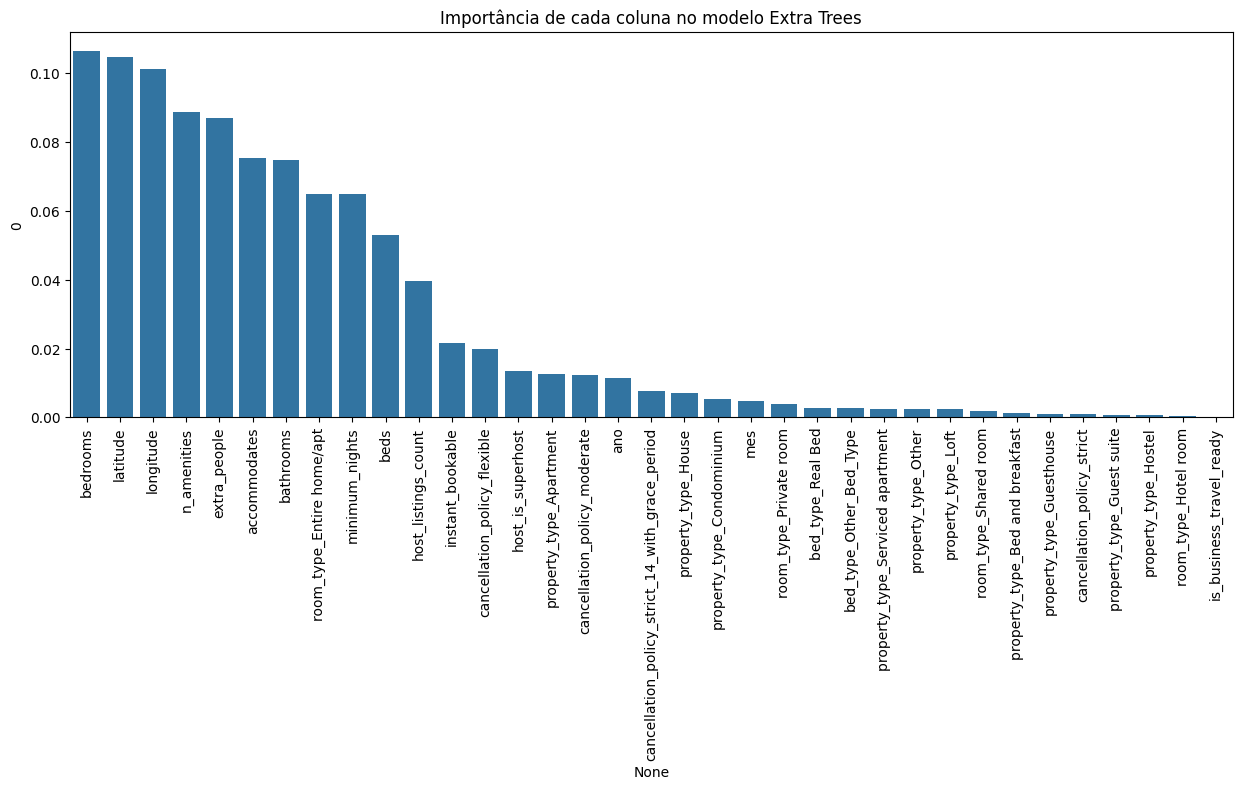

In [63]:
plt.figure(figsize=(15, 5))
barras_features_importances = sns.barplot(x=df_importancia_cada_coluna.index, y=df_importancia_cada_coluna[0])
barras_features_importances.tick_params(axis='x', rotation=90)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.title('Importância de cada coluna no modelo Extra Trees')

<b>[Decisão]</b> - Depois de analisar a importancia de cada feature, vamos testar retirar a coluna 'is business_travel_ready' que não foi significante para o modelo.

In [64]:
df_base_airbnb_cod = df_base_airbnb_cod.drop(columns=['is_business_travel_ready'], axis=1)

x = df_base_airbnb_cod.drop(columns='price', axis=1)  # Variáveis independentes
y = df_base_airbnb_cod['price']  # Variável dependente

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=27)

modelo_et.fit(x_train, y_train)  # Treina o modelo
    # Teste
y_pred = modelo_et.predict(x_test)  # Faz previsões no conjunto de teste
    # Avaliação
print(avaliar_modelo('Extra Trees', y_test, y_pred)) 

Modelo: Extra Trees --> R² = 0.9757579329059493 , RMSE = 41.24166330423457


<b>Resultado sem a feature 'is_business_travel_ready'</b> <br>
- R² = 0.9757143491888368 , RMSE = 41.27871991763886

<b>Resultado anterior, ainda com a feature 'is_business_travel_ready'</b><br>
- R² = 0.9756440285110564 , RMSE = 41.33843932454885

<b>[Decisão]</b> - Vou manter o modelo sem a coluna 'is_business_travel_ready' pois apresentou melhora na metrica R² e RMSE, sem comprometer o tempo de execução e simplicidade do código.

### <b>Conclusão</b>

A coluna 'bedrooms' (número de quartos) e as colunas de localização foram as mais importantes para o modelo na previsão do preço o que já era esperado. 

A coluna de 'n_amenities' se mostrou extremente influente na previsão, o que pode ser explicado pelo comportamento do consumidor ao escolher seu local.

Contraintuitivamente, a sazonalidade não teve a influencia imaginada.

=====================================================================================

#### Salvando a base de dados Tratada

In [65]:
x['price'] = y  # Adiciona a coluna 'price' ao DataFrame x para visualização
x.to_csv('base_de_dados_tratada.csv', index=False, sep=',', encoding='utf-8-sig')

#### Salvando a base de dados de teste com as previsões feitas pelo modelo Extra Trees em sua última rodada.

In [66]:
x_aux = x_test.copy()
x_aux['price'] = y_test  # Adiciona a coluna 'price' com os valores reais do conjunto de teste
x_aux['previsoes_do_modelo_extra_trees'] = y_pred # Adiciona a coluna 'previsao' com as previsões do modelo
x_aux.to_csv('com_previsoes_teste_do_melhor_modelo_base_de_dados.csv', index=False, sep=',', encoding='utf-8-sig')

#### Perpetuando o modelo em um arquivo

In [67]:
import joblib
joblib.dump(modelo_et, 'modelo_extra_trees_airbnb.joblib')

['modelo_extra_trees_airbnb.joblib']